In [152]:
from sympy import *
import matplotlib
init_printing()
matplotlib.rcParams.update({'font.size': 14})

In [ ]:
x = symbols('x')

In [37]:
def inner(u,v):
    return integrate(u * v * x**2, (x,-1,1))
b1 = 1
b2 = x
b3 = x**2

display(b1)
display(b2)
display(b3)

In [38]:
b1 /= sqrt(inner(b1,b1))
b2 -= inner(b2,b1)*b1
b2 /= sqrt(inner(b2,b2))
b3 -= inner(b3,b1)*b1 + inner(b3, b2)*b2
b3 /= sqrt(inner(b3,b3))
display(b1)
display(b2)
display(b3)

In [23]:
display(inner(b1,b2))
display(inner(b1,b3))
display(inner(b2,b3))
display(inner(b1,b1))
display(inner(b2,b2))
display(inner(b3,b3))

In [28]:
sqrt(integrate(x**2, (x,-1,1)))

# Matrix Adjoint

In [52]:
W = Matrix([[1,1],[0,1]])
x1, y1, x2, y2 = symbols('x1 y1 x2 y2')
u = Matrix([[x1],[y1]])
v = Matrix([[x2],[y2]])

In [58]:
print(latex(u.T*W*v))

\left[\begin{matrix}x_{1} x_{2} + y_{2} \left(x_{1} + y_{1}\right)\end{matrix}\right]


In [61]:
u1 = Matrix([[1],[0]])
v1 = Matrix([[-1],[1]])

In [63]:
u1.T*W*v1

[0]

# Minimization

In [99]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

from scipy.interpolate import BarycentricInterpolator as BCI

from math import factorial

In [164]:
d5 = factorial(5)
d7 = factorial(7)
d9 = factorial(9)
def taylor(x):
    return x - x**3/6 + x**5/d5 - x**7/d7 + x**9/d9

def taylorN(x,n):
    s = 0
    for i in range(1,n+1, 2):
        s += (-1)**(i+1) * x**i / factorial(i)

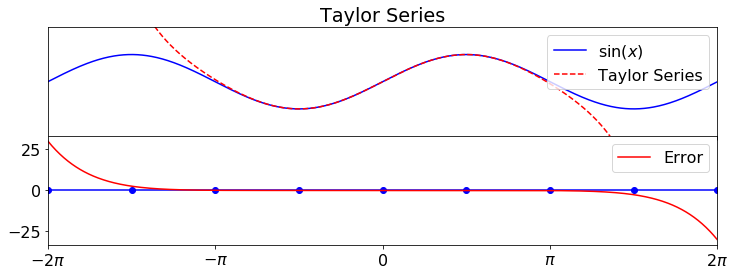

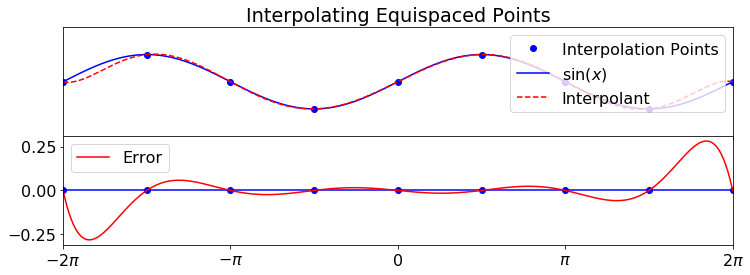

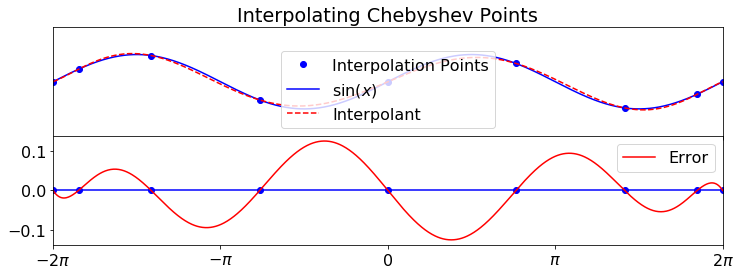

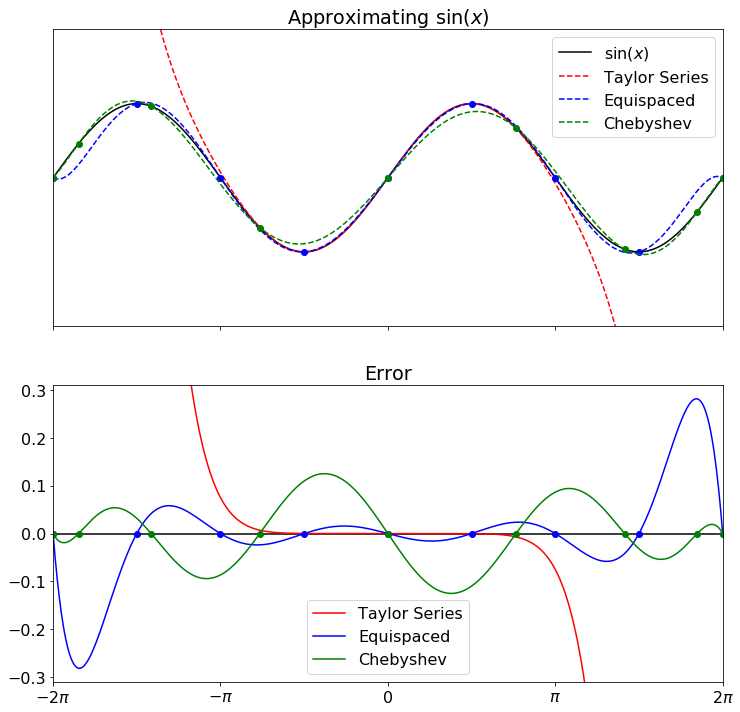

In [194]:
n = 9
a,b = -2*np.pi, 2*np.pi
zs = np.linspace(a, b, 1000)
my_size = (12, 4)
matplotlib.rcParams.update({'font.size': 16})

xs = np.linspace(a, b, n)
ys = np.sin(xs)
ps = BCI(xs, ys)(zs)

x_cheb = np.cos(np.linspace(0, np.pi, n)) * b
y_cheb = np.sin(x_cheb)
p_cheb = BCI(x_cheb, y_cheb)(zs)

x_loc = [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
x_tex = ['$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$']


# Taylor Series
fig, axes = plt.subplots(2,1, sharex=True, figsize=my_size)
axes[0].set_title('Taylor Series')
axes[0].plot(zs, np.sin(zs),'b-', label='$\sin(x)$')
axes[0].plot(zs, taylor(zs), 'r--', label='Taylor Series')
axes[0].legend()
axes[0].set_ylim((-2,2))
axes[0].set_yticks([])

axes[1].plot(xs, [0]*len(xs), 'bo-')
axes[1].plot(zs, taylor(zs)-np.sin(zs), 'r-', label='Error')
axes[1].legend()
plt.xlim(a, b)
plt.subplots_adjust(hspace=0)
plt.xticks(x_loc, x_tex)
plt.show()

# Equispaced Interpolation
fig, axes = plt.subplots(2,1, sharex=True, figsize=my_size)
axes[0].set_title('Interpolating Equispaced Points')
axes[0].plot(xs, ys,'bo', label='Interpolation Points')
axes[0].plot(zs, np.sin(zs),'b-', label='$\sin(x)$')
axes[0].plot(zs, ps, 'r--', label='Interpolant')
axes[0].legend()
axes[0].set_ylim((-2,2))
axes[0].set_yticks([])

axes[1].plot(xs, [0]*len(xs), 'bo-')
axes[1].plot(zs, ps-np.sin(zs), 'r-', label='Error')
axes[1].legend()
plt.xlim(a, b)
plt.subplots_adjust(hspace=0)
plt.xticks(x_loc, x_tex)
plt.show()

# Chebyshev Interpolation
fig, axes = plt.subplots(2,1, sharex=True, figsize=my_size)
axes[0].set_title('Interpolating Chebyshev Points')
axes[0].plot(x_cheb, y_cheb,'bo', label='Interpolation Points')
axes[0].plot(zs, np.sin(zs),'b-', label='$\sin(x)$')
axes[0].plot(zs, p_cheb, 'r--', label='Interpolant')
axes[0].legend()
axes[0].set_ylim((-2,2))
axes[0].set_yticks([])

axes[1].plot(x_cheb, [0]*len(x_cheb), 'bo-')
axes[1].plot(zs, p_cheb-np.sin(zs), 'r-', label='Error')
axes[1].legend()
plt.xlim(a, b)
plt.subplots_adjust(hspace=0)
plt.xticks(x_loc, x_tex)
plt.show()

# All
fig, axes = plt.subplots(2,1, sharex=True, figsize=(12,12))
axes[0].set_title('Approximating $\sin(x)$')
axes[0].plot(zs, np.sin(zs),'k-', label='$\sin(x)$')
axes[0].plot(zs, taylor(zs), 'r--', label='Taylor Series')
axes[0].plot(xs, ys,'bo')
axes[0].plot(zs, ps,'b--', label='Equispaced')
axes[0].plot(x_cheb, y_cheb,'go')
axes[0].plot(zs, p_cheb, 'g--', label='Chebyshev')
axes[0].legend()
axes[0].set_ylim((-2,2))
axes[0].set_yticks([])

axes[1].plot(xs, [0]*len(xs), 'k-')
axes[1].plot(zs, taylor(zs)-np.sin(zs), 'r-', label='Taylor Series')
axes[1].plot(xs, [0]*len(xs), 'bo')
axes[1].plot(zs, ps-np.sin(zs), 'b-', label='Equispaced')
axes[1].plot(x_cheb, [0]*len(x_cheb), 'go')
axes[1].plot(zs, p_cheb-np.sin(zs), 'g-', label='Chebyshev')
max_val = np.max(ps-np.sin(zs))
axes[1].set_ylim((-1.1*max_val,1.1*max_val))
axes[1].legend()
plt.xlim(a, b)
#plt.subplots_adjust(hspace=0)
axes[1].set_title('Error')
plt.xticks(x_loc, x_tex)
plt.show()

In [189]:
max_val

NameError: name 'max_val' is not defined

# Problem 5

In [1]:
from sympy import *
from sympy.abc import lamda #python uses the correct spelling "lambda" as a keyword.
display(lamda)
init_printing()

Define the inner product as
$$
\langle \vec{x}, \vec{w} \rangle =  \vec{w}^TW \vec{x}
$$
where $$W = \begin{bmatrix}1 & 1 \\ 0 & 1 \end{bmatrix}$$

In [98]:
u1, u2, v1, v2, w1, w2 = symbols('u1 u2 v1 v2 w1 w2')
u = Matrix([[v1],[v2]])
v = Matrix([[u1],[u2]])
w = Matrix([[w1],[w2]])

W = Matrix([[2, 1], [1,1]])

def inner(u,v):
    return (v.T*W*u)[0]

In [70]:
W.eigenvals()

This matrix is SPD so it should be an ok inner product.

In [88]:
# Check if the inner product is defined correctly.

print('\n')
print('positive definite')
display(inner(u,u).expand())
display(v1**2 + ((v1+v2)**2).expand())

symmetric




positive definite


This last line shows that $\langle \vec{v}, \vec{v} \rangle = v_1^2 + (v_1+v_2)^2$. Since it is the sum of squares it is non-negavite and only equal to zero when $v_1 = 0$ and $v_1 + v_2 = 0$. This only occurs when $\vec{v}=\vec{0}$.

In [100]:
print('additivity')
display(inner(u+v,w).expand())
display( (inner(u,w) + inner(v,w)).expand() )

print('\n')

print('homogeneity')
display(inner(lamda*u,v).expand())
display( (lamda*inner(u,v)).expand() )

print('\n')

print('symmetric')
display(inner(u,v).expand())
display(inner(v,u).expand())

additivity




homogeneity




symmetric


We've verified that this is indeed a valid inner product. Now we can define 
\begin{align*}
    T(\vec{x}) &= \begin{bmatrix}0&-1\\1&0\end{bmatrix}\vec{x} \\
    T\left( \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} \right) &= \begin{bmatrix}-x_2 \\ x_1 \end{bmatrix}
\end{align*}
And ask the question what is the adjoint $T^*$. The matrix representation here is very useful. W use the definitiion of adjoint as follows
\begin{align*}
\langle T\vec{u}, \vec{v} \rangle &= \langle \vec{u}, T^*\vec{v} \rangle \\
\vec{v}^T W T \vec{u} &= (T^*\vec{v})^T W \vec{u}\\
        &= \vec{v}^T T^{*T} W \vec{u}
\end{align*}
Since this is true for all $\vec{u},\vec{v}$ and since $WT$ is full rank, we must have that
$$
T^{*T} W = WT
$$
and thus
$$
T^{*} = W^{-1}T^TW
$$
gives us $T^*$.

In [112]:
#adjoint = (W*T*W**-1).T
adjoint = W**-1 * T.T * W
display(adjoint)

⎡3   2 ⎤
⎢      ⎥
⎣-5  -3⎦

Thus our function is 
$$
T^{*}(\vec{x}) = \left[\begin{matrix}3 & 2\\-5 & -3\end{matrix}\right] \vec{x}
$$
We can check this by verifying $\langle T\vec{u}, \vec{v} \rangle = \langle \vec{u}, T^*\vec{v} \rangle$.

In [113]:
display(inner(T*u, v).expand())
display(inner(u, adjoint*v).expand())

This verifies our calculation.